# Lienales 

## Jacobi

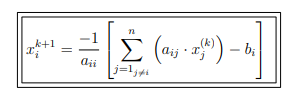

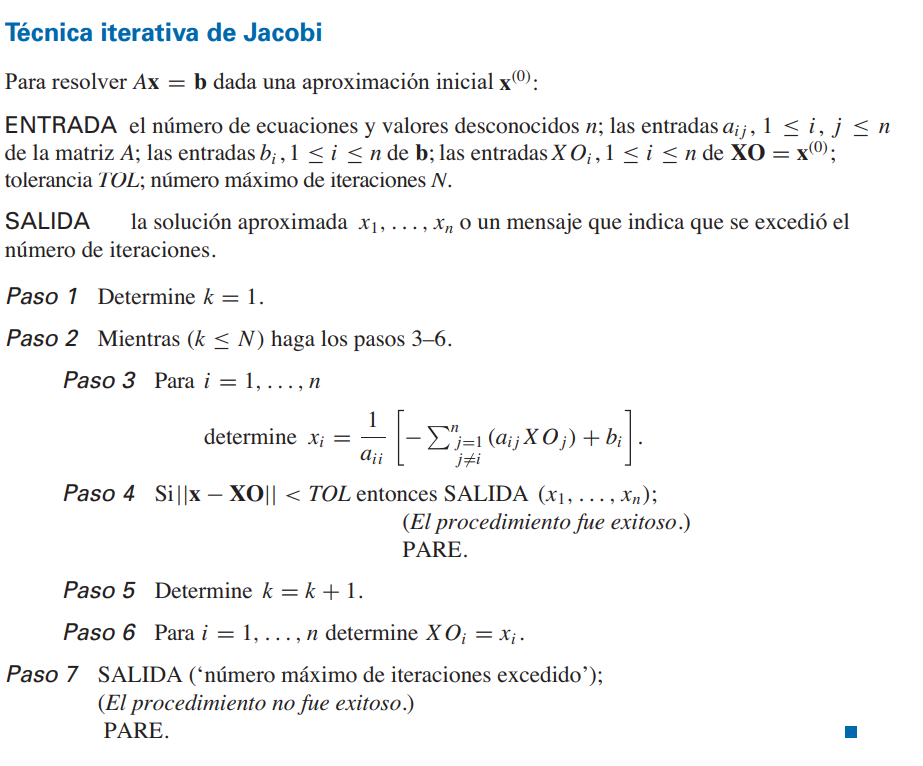

In [6]:
def jacobi(matrix, b, xo, N, tol):
    k = 1
    x = []
    while k <= N:
        for i in range(len(matrix)):
            sumParcial = 0
            for j in range(len(matrix)):
                if j != i:
                    sumParcial += matrix[i][j] * xo[j]
            x_i = (-1 / matrix[i][i]) * (sumParcial - b[i])
            x.append(x_i)
        print('x_' + str(k + 1), x)
        error = sum(np.array(x) - np.array(xo))
        print('Error',error)
        if (np.absolute(error)) < tol:
            print('Numero de iteracioones necesarias:',k)
            print('x_'+str(k+1),x)
            break
        k += 1
        xo = x
        x = []
                           
                            
    

In [7]:
matrix = [[2,-1,0],[-5,15,-10],[0,-4,6]]
b = [3,10,2]
xo = [1,1,1]
jacobi(matrix,b,xo,3,10**-3)

x_2 [2.0, 1.6666666666666667, 1.0]
Error 1.6666666666666667
x_3 [2.3333333333333335, 2.0, 1.4444444444444446]
Error 1.1111111111111114
x_4 [2.5, 2.4074074074074074, 1.6666666666666665]
Error 0.7962962962962958


## Gauss - Seidel

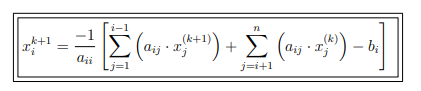

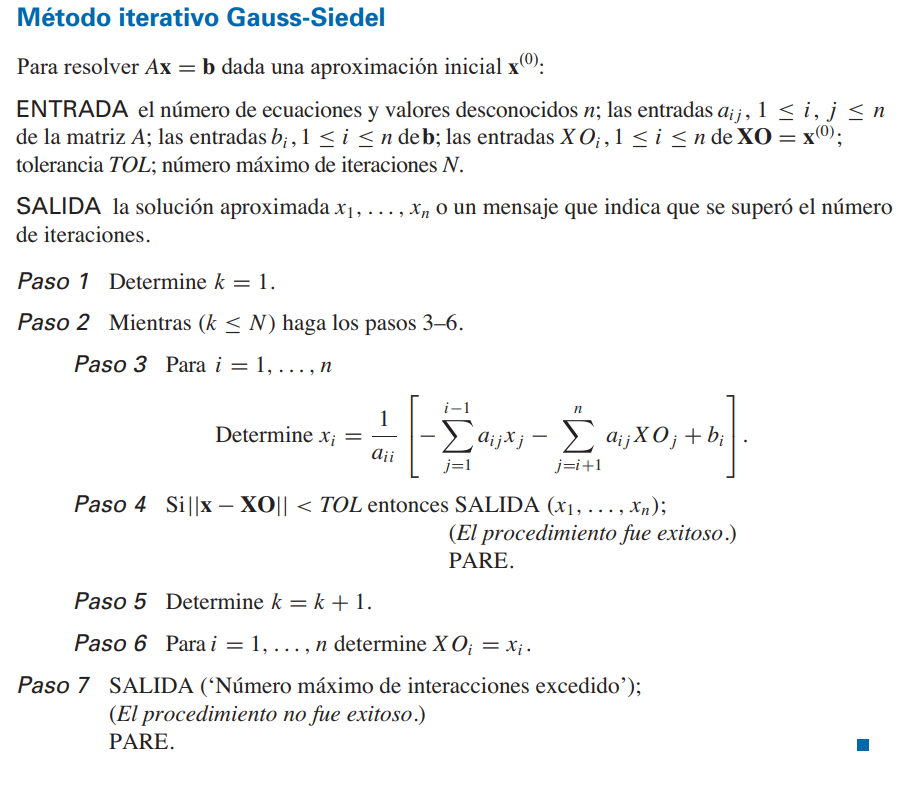

In [8]:
def seidel(matrix, b, xo, N, tol):
    k = 1
    x = []
    while k <= N:
        i = 1
        while i <= len(matrix):
            sumParcial1 = 0
            sumParcial2 = 0
            for a in range(i-1):
                sumParcial1 += matrix[i-1][a] * x[a]

            for j in range(i,len(matrix)):
                    if j < len(matrix):
                        sumParcial2 += matrix[i-1][j] * xo[j]

            x_i = (-1 / matrix[i-1][i-1]) * (sumParcial1+sumParcial2 - b[i-1])
            x.append(x_i)
            i += 1
        print('x_' + str(k + 1), x)
        error = sum(np.array(x) - np.array(xo))
        print('Error',error)
        if (np.absolute(error)) < tol:
            print('Numero de iteracioones necesarias:',k)
            print('x_'+str(k+1),x)
            break
        k += 1
        xo = x
        x = []

In [9]:
matrix = [[2,-1,0],[-5,15,-10],[0,-4,6]]
b = [3,10,2]
xo = [1,1,1]
seidel(matrix,b,xo,3,10**-3)

x_2 [2.0, 2.0, 1.6666666666666665]
Error 2.6666666666666665
x_3 [2.5, 2.6111111111111107, 2.0740740740740735]
Error 1.5185185185185177
x_4 [2.8055555555555554, 2.9845679012345676, 2.3230452674897117]
Error 0.9279835390946505


# No lineales 

## Biseccion 

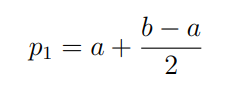 

Numero de iteraciones 

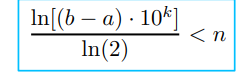

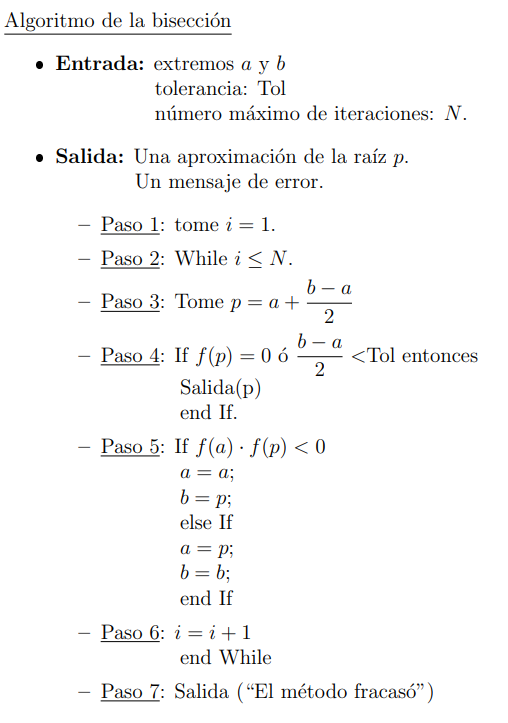

## Implementacion en Python

In [2]:
import numpy as np
import math as mt
from prettytable import PrettyTable
from matplotlib import pyplot as plt

def p_calc(a,b):
    p = a+((b-a)/2)
    return p

def f_p(p):
    return p**4-10

def eror_p(a,b):
    return (b-a)/2

def sgn(f_x):
    if f_x < 0:
        return -1
    if f_x == 0:
        return 0
    if f_x > 0:
        return 1
    
x_array = []
y_array = []
p_array = []
fp_array = []
def bisec(a,b,N,tol):
    x = PrettyTable()
    x.field_names = ["N", "a", "b", "p","f(p)","b-a/2"]  
    i = 1
    if N==0:
        N = mt.ceil(np.log((b-a)/tol)/np.log(2))  
    print('Maximo de iteraciones:',N)
    while i <= N:
        p = p_calc(a,b)
        fp = f_p(p)
        eror = eror_p(a,b)
        x.add_row([i,a,b,p,fp,eror])
        x_array.append(a)
        y_array.append(b)
        p_array.append(p)
        fp_array.append(fp)
        if f_p(p)==0 or eror < tol:
            print('P=',p)
            break
        if sgn(f_p(a))*sgn(fp)<0:
            a = a
            b = p
        else:
            a = p
            b = b
        i+=1
    return x

In [3]:
p_calc(0,3.5)

1.75

In [45]:
print(bisec(1,2,0,10**-3).get_string())

Maximo de iteraciones: 10
P= 1.7783203125
+----+------------+-------------+--------------+-----------------------+--------------+
| N  |     a      |      b      |      p       |          f(p)         |    b-a/2     |
+----+------------+-------------+--------------+-----------------------+--------------+
| 1  |     1      |      2      |     1.5      |        -4.9375        |     0.5      |
| 2  |    1.5     |      2      |     1.75     |      -0.62109375      |     0.25     |
| 3  |    1.75    |      2      |    1.875     |     2.359619140625    |    0.125     |
| 4  |    1.75    |    1.875    |    1.8125    |   0.7922515869140625  |    0.0625    |
| 5  |    1.75    |    1.8125   |   1.78125    |   0.0669870376586914  |   0.03125    |
| 6  |    1.75    |   1.78125   |   1.765625   |  -0.28161996603012085 |   0.015625   |
| 7  |  1.765625  |   1.78125   |  1.7734375   |  -0.10846823081374168 |  0.0078125   |
| 8  | 1.7734375  |   1.78125   |  1.77734375  | -0.021029807394370437 |  0.00

In [133]:
from decimal import Decimal, getcontext
getcontext().prec = 9
r = Decimal(6.67572021484375e-06)
print(r)

0.00000667572021484375


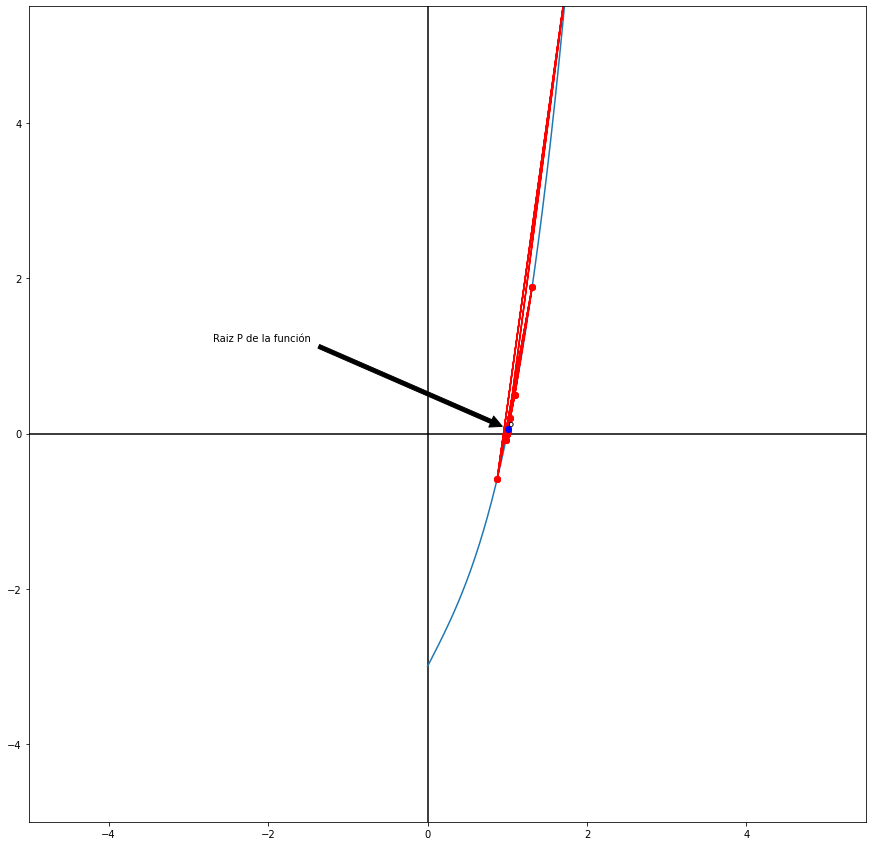

In [5]:
from matplotlib import pyplot as plt
x = np.linspace(0, 3.5, 200)
plt.figure(figsize=(15, 15))
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlim(-5, 5.5)
plt.ylim(-5, 5.5)
plt.plot(x,x**3+2*x-3)
plt.plot(p_array,fp_array, marker="o", color="red",)
plt.plot(p_array[18],fp_array[18], marker="o", color="b")
plt.annotate('P',(p_array[18],fp_array[18]))
plt.annotate('Raiz P de la función',
            xy=(p_array[18],fp_array[18]),  # theta, radius
            xytext=(0.30, 0.60),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.03),
            horizontalalignment='center',
            verticalalignment='center')

plt.show()

## Punto fijo

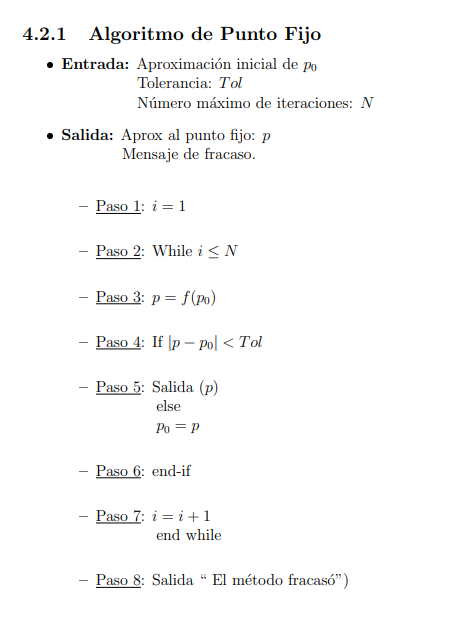

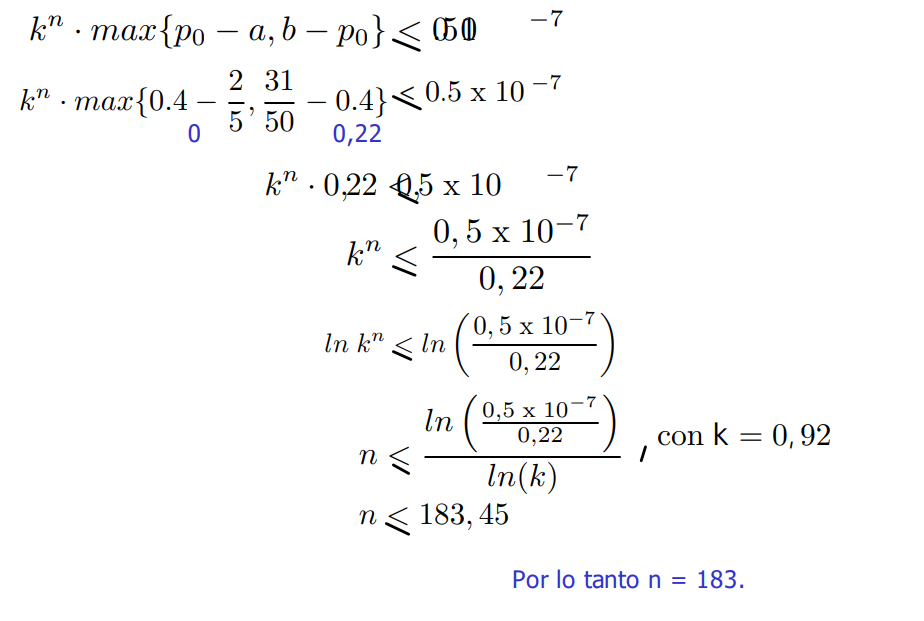

Cota de error

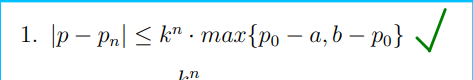

In [37]:
import numpy as np
from prettytable import PrettyTable
def fun(p):
    return 1-np.sin(p)

def iteracion_punto_fijo(p_i,n,tol):
    X = PrettyTable()
    X.field_names = ["N","f(p_n-1)","p_n",'error']  
    i=1
    X.add_row([0,'----',p_i,'----'])
    while i <= n:
        p = fun(p_i)
        error = np.absolute(p - p_i)
        X.add_row([i,p_i,p,error])
        if error < tol:
            print('P:',p)
            break
        else:
            p_i = p
        i += 1
    return X

In [44]:
print(iteracion_punto_fijo(0.4,5,10**-4).get_string())

+---+---------------------+---------------------+---------------------+
| N |       f(p_n-1)      |         p_n         |        error        |
+---+---------------------+---------------------+---------------------+
| 0 |         ----        |         0.4         |         ----        |
| 1 |         0.4         |  0.6105816576913494 |  0.2105816576913494 |
| 2 |  0.6105816576913494 | 0.42665588226050355 | 0.18392577543084587 |
| 3 | 0.42665588226050355 |  0.5861712113499916 | 0.15951532908948807 |
| 4 |  0.5861712113499916 | 0.44682454357124557 | 0.13934666777874605 |
| 5 | 0.44682454357124557 |  0.5678959846140933 | 0.12107144104284773 |
+---+---------------------+---------------------+---------------------+


In [31]:
2* 0.49999713183177363**2-7* 0.49999713183177363+3

1.4340857584560496e-05

## Newton

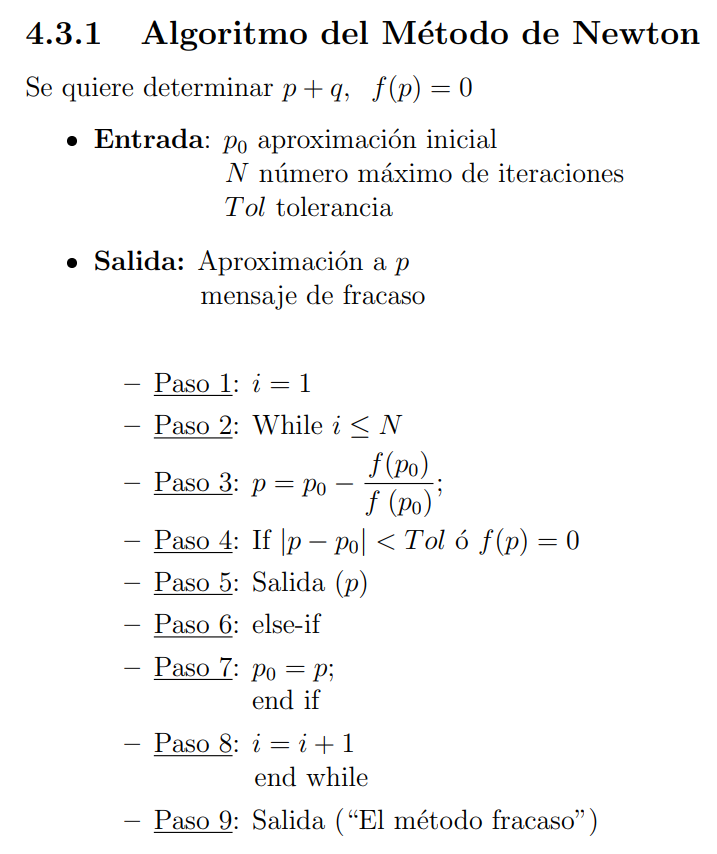

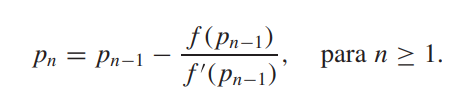

In [30]:
import numpy as np
from prettytable import PrettyTable
def funn(p):
    return p**2-1
def funn_dx(p):
    return 2*p

def iteracion_newton(p_i,n,tol):
    X = PrettyTable()
    X.field_names = ["N","x_n-1","x_n",'f(x)','error']  
    i=1
    while i <= n:
        p = p_i - (funn(p_i)/funn_dx(p_i))
        error = np.absolute(p - p_i)
        f_p = funn(p)
        X.add_row([i,p_i,p,f_p,error])
        if error < tol or f_p == 0 :
            print('P:',p)
            break
        else:
            p_i = p
        i += 1
    return X

In [31]:
print(iteracion_newton(1.5,20,10**-4).get_string())

P: 1.000000000013107
+---+--------------------+--------------------+------------------------+-----------------------+
| N |       x_n-1        |        x_n         |          f(x)          |         error         |
+---+--------------------+--------------------+------------------------+-----------------------+
| 1 |        1.5         | 1.0833333333333333 |  0.17361111111111094   |  0.41666666666666674  |
| 2 | 1.0833333333333333 | 1.0032051282051282 |  0.006420529257067598  |  0.08012820512820507  |
| 3 | 1.0032051282051282 | 1.0000051200131073 | 1.0240052429111302e-05 |  0.003200008192020931 |
| 4 | 1.0000051200131073 | 1.000000000013107  | 2.6214141968239346e-11 | 5.120000000191638e-06 |
+---+--------------------+--------------------+------------------------+-----------------------+


## Secante

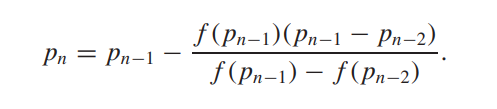

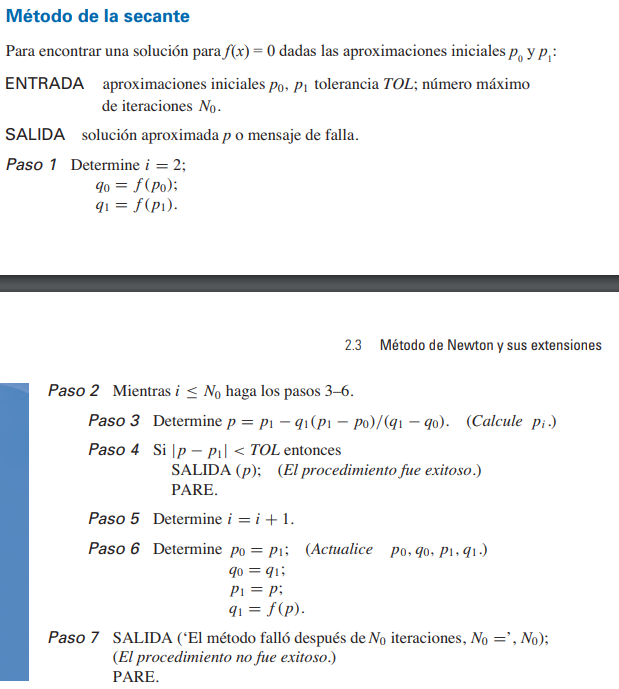

In [22]:
import numpy as np
from prettytable import PrettyTable
def funs(p):
    return  p**2-1

def iteracion_secante(p_0, p_1, n, tol):
    X = PrettyTable()
    X.field_names = ["N", "x_n-1", "x_n", 'f(x)', 'error']
    q_0 = funs(p_0)
    q_1 = funs(p_1)
    X.add_row([1, p_0, p_1, q_1, p_1 - p_0])
    i = 2
    while i <= n:
        p = (p_1 - (q_1*(p_1 - p_0) / (q_1 - q_0)))
        error = np.absolute(p - p_1)
        f_p = funs(p)
        X.add_row([i, p_1, p, f_p, error])
        if error < tol:
            print('P:', p)
            break
        else:
            p_0 = p_1
            q_0 = q_1
            p_1 = p
            q_1 = funs(p)

        i += 1
    return X

In [32]:
print(iteracion_secante(0.5,0.7,20,10**-4).get_string())

P: 0.9999999922589052
+---+--------------------+--------------------+-------------------------+------------------------+
| N |       x_n-1        |        x_n         |           f(x)          |         error          |
+---+--------------------+--------------------+-------------------------+------------------------+
| 1 |        0.5         |        0.7         |          -0.51          |  0.19999999999999996   |
| 2 |        0.7         |       1.125        |         0.265625        |  0.42500000000000004   |
| 3 |       1.125        | 0.9794520547945206 |   -0.04067367235879149  |  0.14554794520547942   |
| 4 | 0.9794520547945206 | 0.9987794955248169 |  -0.002439519319192174  |  0.019327440730296352  |
| 5 | 0.9987794955248169 | 1.0000126774133569 |  2.5354987430503684e-05 |  0.001233181888539936  |
| 6 | 1.0000126774133569 | 0.9999999922589052 | -1.5482189419380177e-08 | 1.2685154451630432e-05 |
+---+--------------------+--------------------+-------------------------+--------------

## Metodo de Newton-para raıces multiples

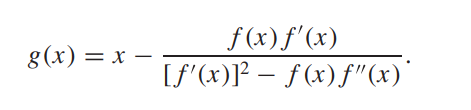

In [3]:
import numpy as np
from prettytable import PrettyTable
def funnm(p):
    return p**3 - 5*p**2 + 7*p - 3
def funnm_dx(p):
    return 3*p**2 - 10*p + 7 
def funnm_dx_2(p):
    return 6*p - 10 

def iteracion_newton_rmultiple(p_i,n,tol):
    X = PrettyTable()
    X.field_names = ["N","x_n-1","x_n",'f(x)','error']  
    i=1
    while i <= n:
        p = p_i - (funnm(p_i)*funnm_dx(p_i)/((funnm_dx(p_i))**2 - funnm(p_i)*funnm_dx_2(p_i)))
        error = np.absolute(p - p_i)
        f_p = funnm(p)
        X.add_row([i,p_i,p,f_p,error])
        if error < tol or f_p == 0 :
            print('P:',p)
            break
        else:
            p_i = p
        i += 1
    return X

In [6]:
print(iteracion_newton_rmultiple(0,20,10**-9).get_string())

P: 1.0000000000746248
+---+--------------------+--------------------+-------------------------+------------------------+
| N |       x_n-1        |        x_n         |           f(x)          |         error          |
+---+--------------------+--------------------+-------------------------+------------------------+
| 1 |         0          | 1.105263157894737  |   -0.02099431403994867  |   1.105263157894737    |
| 2 | 1.105263157894737  | 1.0030816640986033 | -1.8964041736957427e-05 |  0.10218149379613362   |
| 3 | 1.0030816640986033 | 1.0000023814938155 |  -1.13429265979903e-11  | 0.0030792826047878474  |
| 4 | 1.0000023814938155 | 1.0000000000373122 |  -8.881784197001252e-16 | 2.381456503330881e-06  |
| 5 | 1.0000000000373122 | 1.0000000000746248 |           0.0           | 3.7312597456207186e-11 |
+---+--------------------+--------------------+-------------------------+------------------------+


### Si se conce la multiplicidad se puede hacer 


donde m es la mutiplicidad

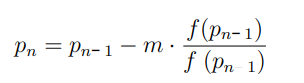

In [29]:
import numpy as np
from prettytable import PrettyTable
def funnmm(p):
    return p**3 - 5*p**2 + 7*p - 3  
def funnmm_dx(p):
    return 3*p**2 - 10*p + 7

def iteracion_newton_mc(p_i,n,tol,m):
    X = PrettyTable()
    X.field_names = ["N","x_n-1","x_n",'f(x)','error']  
    i=1
    while i <= n:
        p = p_i - (m*(funnmm(p_i)/funnmm_dx(p_i)))
        error = np.absolute(p - p_i)
        f_p = funnmm(p)
        X.add_row([i,p_i,p,f_p,error])
        if error < tol or f_p == 0 :
            print('P:',p)
            break
        else:
            p_i = p
        i += 1
    return X

In [30]:
print(iteracion_newton_mc(0,20,10**-9,2).get_string())

P: 0.9999999999897486
+---+--------------------+--------------------+-------------------------+-----------------------+
| N |       x_n-1        |        x_n         |           f(x)          |         error         |
+---+--------------------+--------------------+-------------------------+-----------------------+
| 1 |         0          | 0.8571428571428571 |  -0.043731778425655676  |   0.8571428571428571  |
| 2 | 0.8571428571428571 | 0.9953917050691234 |  -4.257062785306687e-05 |  0.13824884792626635  |
| 3 | 0.9953917050691234 |  0.99999470919076  | -5.5985438507377694e-11 |   0.0046030041216365  |
| 4 |  0.99999470919076  | 0.9999999999897486 |           0.0           | 5.290798988699663e-06 |
+---+--------------------+--------------------+-------------------------+-----------------------+


In [49]:
111*(111*(-3.11+111*(-4.62+112))+12.2)-1.99

146819250.67999998

In [48]:
112*(112*(-3.11+112*(-4.62+113))+12.2)-1.99

152228449.20999998

In [57]:
b = 147249141.9 - 146819250.7 
b  ## E.A CON CORTE

429891.2000000179

In [58]:
a = np.absolute( 147249141.9 - 152228449.2)
a ## E.A CON REDONDEO

4979307.299999982

In [55]:
b/147249141.9 ## E.R CON CORTE

0.0029194818689807106

0.0029194818689807106 = $2.919481868x^{-3}$

In [56]:
a/147249141.9 ##E.5 CON REDONDEO

0.03381552677150088